In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

## Load edge list of the GEM

In [7]:
df = pd.read_csv('toy.csv')

In [8]:
df.shape

(26, 2)

In [9]:
# '''
# Reactions names to integer ID
# '''
# from sklearn.preprocessing import LabelEncoder

# rxn = pd.concat([df['s'], df['t']])

# le = LabelEncoder()
# le.fit_transform(rxn)

# df['s'] = le.transform(df['s'])
# df['t'] = le.transform(df['t'])

In [10]:
from networkx import from_pandas_edgelist

G = from_pandas_edgelist(df, source='s', target='t')
print('Nodes =', G.number_of_nodes())
print('Edges = ', G.number_of_edges())

Nodes = 17
Edges =  26


Number of nodes (reactions): 17


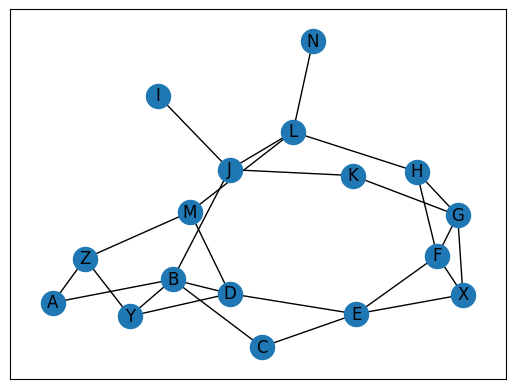

In [11]:
print('Number of nodes (reactions):', len(G.nodes))
nx.draw_networkx(G)
plt.show()

In [12]:
print("Network density:", nx.density(G))

Network density: 0.19117647058823528


In [14]:
import community 

partition = community.best_partition(G)
partition

{'A': 1,
 'B': 1,
 'Z': 1,
 'Y': 1,
 'D': 1,
 'C': 1,
 'J': 2,
 'E': 3,
 'M': 0,
 'X': 3,
 'F': 3,
 'G': 3,
 'K': 2,
 'H': 3,
 'L': 0,
 'N': 0,
 'I': 2}

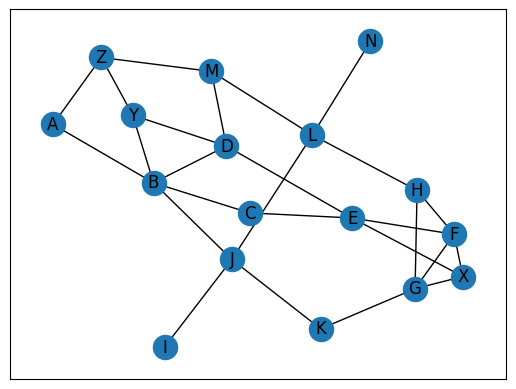

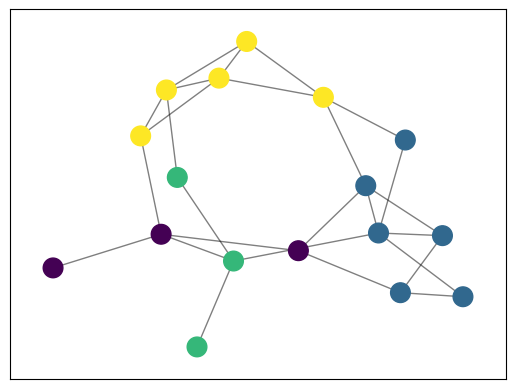

In [36]:
import matplotlib.cm as cm

nx.draw_networkx(G)
plt.show()

# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=200, label=True,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5, label=True)
plt.show()

__The density value implies that this is not very dense network (on a scale from 0-1).__

In [29]:
from operator import itemgetter

betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

for b in sorted_betweenness:
    print(b)

(9, 0.28125)
(1, 0.2520833333333333)
(11, 0.25069444444444444)
(4, 0.1548611111111111)
(3, 0.14583333333333337)
(12, 0.11666666666666667)
(7, 0.09027777777777776)
(6, 0.07083333333333333)
(5, 0.06319444444444444)
(10, 0.061111111111111116)
(16, 0.03680555555555555)
(2, 0.03333333333333333)
(15, 0.031944444444444435)
(14, 0.01944444444444444)
(0, 0.016666666666666666)
(13, 0.0)
(8, 0.0)


In [30]:
pagerank_dict = nx.pagerank(G)
sorted_pagerank = sorted(pagerank_dict.items(), key=itemgetter(1), reverse=True)

for b in sorted_pagerank:
    print(b)

(1, 0.09163103257089522)
(9, 0.08146860059707867)
(11, 0.08063547198430118)
(6, 0.07319857052303287)
(3, 0.07194496375696373)
(4, 0.07155675411967773)
(5, 0.07112651286489884)
(16, 0.05858749889125256)
(12, 0.05784569740829724)
(7, 0.05662719874584951)
(15, 0.05628808991300825)
(14, 0.054698402884015125)
(10, 0.041690763814112235)
(0, 0.04099991053221236)
(2, 0.03960636030992535)
(8, 0.026136024545072176)
(13, 0.025958146539406715)


#### Node Embedding using Deep Walk

In [31]:
from karateclub import DeepWalk

In [32]:
dw_model = DeepWalk(walk_number=10, walk_length=80, dimensions=64)
dw_model.fit(G)
embedding = dw_model.get_embedding()
print(embedding.shape)

(17, 64)


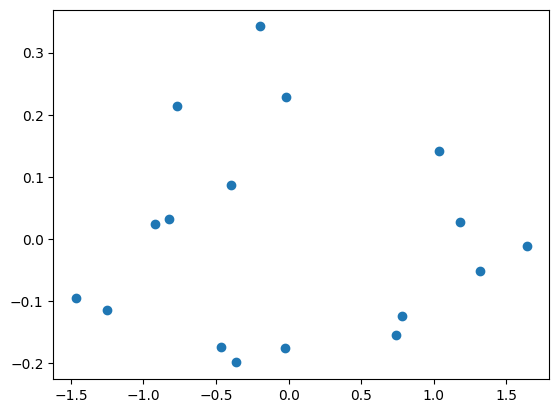

In [33]:
import sklearn

pca_model = sklearn.decomposition.PCA(n_components=2)
low_dim_embedding = pca_model.fit_transform(embedding)
plt.scatter(low_dim_embedding[:,0], low_dim_embedding[:,1])
plt.show()

### Clustering

In [34]:
from sklearn.cluster import KMeans

In [35]:
x = low_dim_embedding[:,0]
y = low_dim_embedding[:,1]

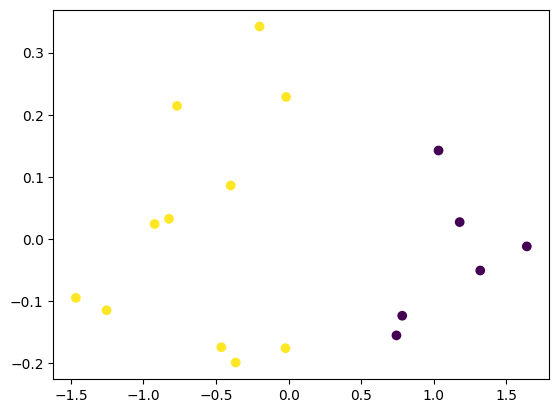

In [36]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(low_dim_embedding)

plt.scatter(x, y, c=kmeans.labels_)
plt.show() 

In [ ]:
kmeans.labels_

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int32)

In [39]:
results = pd.DataFrame()

results['rxn'] = G.nodes
results['cluster'] = kmeans.labels_

for row in range(len(results)):
    results['rxn'].iloc[row] = le.inverse_transform([results['rxn'].iloc[row] ])

results[results['cluster'] == 1]

/home/comex/Desktop/python-envs/main-bio/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,rxn,cluster
0,[A],1
1,[B],1
16,[Z],1
15,[Y],1
12,[M],1
14,[X],1
6,[G],1
10,[K],1
7,[H],1
13,[N],1


In [40]:
results[results['cluster'] == 0]

,rxn,cluster
3,[D],0
2,[C],0
9,[J],0
4,[E],0
5,[F],0
11,[L],0


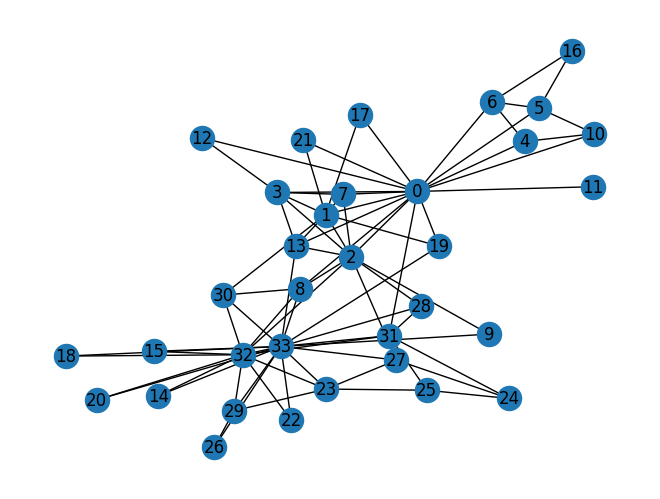

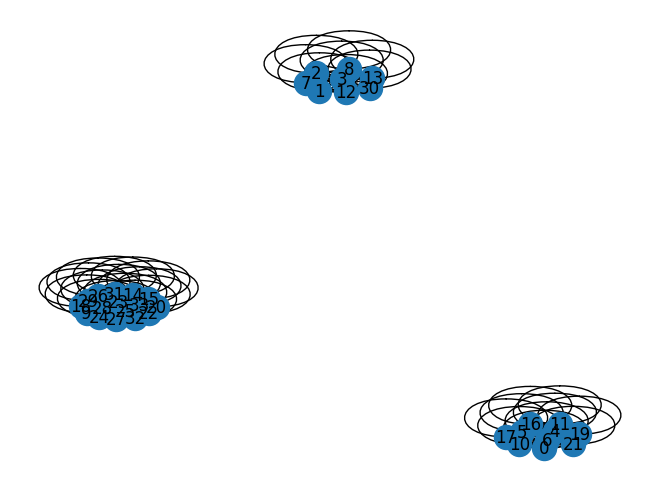

In [41]:
import networkx as nx
from community import best_partition

# Load the Karate Club graph
G = nx.karate_club_graph()

# Compute the best partition of the graph using the Louvain algorithm
partition = best_partition(G)

# Create a new graph with the same nodes as the original graph
H = nx.Graph()
H.add_nodes_from(G.nodes)

# Add edges between nodes in the same community
for node, community in partition.items():
    for neighbor, neighbor_community in partition.items():
        if community == neighbor_community:
            H.add_edge(node, neighbor)

# Plot the original and reduced graphs
import matplotlib.pyplot as plt
plt.figure()
nx.draw(G, with_labels=True)
plt.figure()
nx.draw(H, with_labels=True)
plt.show()
